In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import shapiro, normaltest

In [3]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

### Data Understanding

In [5]:
display(df_train.describe())
display(df_train.info())
display(df_train.columns)
display(df_train.shape)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(1460, 81)

Insight:
- The dataset contains 81 columns with 1460 rows
- Several columns have misisng values

### Check Missing Values

In [6]:
null_percentage = df_train.isnull().sum() / len(df_train) * 100
null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False)
display(null_percentage)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

Insight:
- Based on that we know that several columns has a lot of missing values > 45%
- The best practice is to remove the missing values > 10% , but since there's data description we should deep research about it

In [7]:
# Copy the dataset to avoid modifying the original data
final_df = df_train.copy()

### Handling Missing Values

#### PoolQC

In [8]:
display(final_df.PoolQC.unique())

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

Based on the data description, the unique values in this column are:
- Ex	Excellent
- Gd	Good
- TA	Average/Typical
- Fa	Fair
- NA	No Pool

From this, we can conclude that the missing values in this column are not truly missing data, but instead represent the absence of that particular feature

In [9]:
final_df.PoolQC = final_df.PoolQC.fillna("NA")

#### MiscFeature

In [10]:
final_df.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

Based on the data description, the unique values in this column are:
- Elev	Elevator
- Gar2	2nd Garage (if not described in garage section)
- Othr	Other
- Shed	Shed (over 100 SF)
- TenC	Tennis Court
- NA	None

From this, we can conclude that the missing values in this column are not truly missing data, but instead represent the absence of that particular feature

In [11]:
final_df.MiscFeature = final_df.MiscFeature.fillna("NA")

#### Alley

In [12]:
final_df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

Based on the data description, the unique values in this column are:

- Grvl	Gravel
- Pave	Paved
- NA 	No alley access

From this, we can conclude that the missing values in this column are not truly missing data, but instead represent the absence of that particular feature

In [13]:
final_df.Alley = final_df.Alley.fillna("NA")

#### Fence

In [14]:
final_df.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

Based on the data description, the unique values in this column are:

- GdPrv	Good Privacy
- MnPrv	Minimum Privacy
- GdWo	Good Wood
- MnWw	Minimum Wood/Wire
- NA	No Fence

From this, we can conclude that the missing values in this column are not truly missing data, but instead represent the absence of that particular feature

In [15]:
final_df.Fence = final_df.Fence.fillna("NA")

#### MasVnrType

In [16]:
final_df.MasVnrType.unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

Based on the data description, the unique values in this column are:

- BrkCmn	Brick Common
- BrkFace	Brick Face
- CBlock	Cinder Block
- None	None
- Stone	Stone

From this, we can conclude that the missing values in this column are not truly missing data, but instead represent the absence of that particular feature

In [17]:
final_df.MasVnrType = final_df.MasVnrType.fillna("None")

#### FireplaceQu

In [18]:
final_df.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

Based on the data description, the unique values in this column are:

- Ex	Excellent - Exceptional Masonry Fireplace
- Gd	Good - Masonry Fireplace in main level
- TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa	Fair - Prefabricated Fireplace in basement
- Po	Poor - Ben Franklin Stove
- NA	No Fireplace

From this, we can conclude that the missing values in this column are not truly missing data, but instead represent the absence of that particular feature

In [19]:
final_df.FireplaceQu = final_df.FireplaceQu.fillna("NA")

#### Garage

Since we have 5 columns describing Garage with different aspects of a garage. All the columns have same percentage of missing values, we need to check if the missing vlaues are in the same entries.

In [20]:
final_df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().sum(axis=1).value_counts()

0    1379
5      81
Name: count, dtype: int64

Based on the table above, we can sure that only 81 houses with no garage

In [21]:
garage_cat = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cat:
    final_df[col] = final_df[col].fillna("NA")
garage_num = ['GarageYrBlt']
for col in garage_num:
    final_df[col] = final_df[col].fillna(0)

In [22]:
n_percentage = df_train.isnull().sum() / len(df_train) * 100
n_percentage = n_percentage[n_percentage == 0].sort_values(ascending=False)

#### Basement

Based on the data description, all the columns are categorical columns. By looking at the data desc, we can understand that those missing values mean that the house has no basement.

In [23]:
basement_cat = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basement_cat:
    final_df[col] = final_df[col].fillna("NA")

#### LotFrontAge

We know that this column had missing values (17%). The reason for these misisng values remians unclear. We need to check the distribution first so we can simply fill the column with proper values

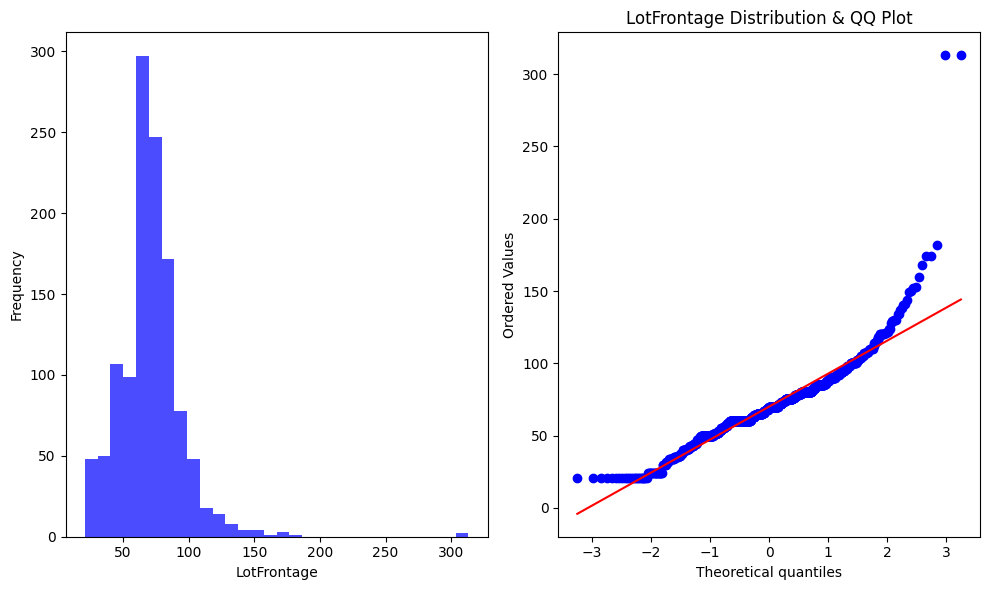

In [24]:
# Create plot figure (base size)
plt.figure(figsize=(10, 6))

# 1st plot
plt.subplot(1, 2, 1) # We want 1 row, 2 columns, this is the 1st plot
plt.hist(final_df['LotFrontage'].dropna(), bins=30, color='blue', alpha=0.7) # alpha is for transparency
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2) # We want 1 row, 2 columns, this is the 2nd plot
stats.probplot(final_df['LotFrontage'].dropna(), dist="norm", plot=plt) # QQ plot

plt.title('LotFrontage Distribution & QQ Plot')
plt.tight_layout() # Adjust subplots to fit into figure area.
plt.show()

In [25]:
stat, p_value = shapiro(final_df['LotFrontage'].dropna())
print(f'Shapiro-Wilk Test: p-value = {p_value}')
if p_value > 0.05:
    print('Data distributed normally')
else:
    print('Data distributed not normal')

Shapiro-Wilk Test: p-value = 2.0016921293556985e-29
Data distributed not normal


We know that the column is not normally distributed from the histogram and QQ plot as well as the p-value from the Shapiro-Wilk test being less than 0.05. So for imputing the missing values, we can use the median or mode. Here, we will use the median to fill in the missing values because it is less affected by outliers compared to the mean.

In [26]:
final_df.LotFrontage = final_df.LotFrontage.fillna(final_df['LotFrontage'].median())

#### MasVnrArea

In [27]:
stat, p_value = shapiro(final_df['MasVnrArea'].dropna())
print(f'Shapiro-Wilk Test: p-value = {p_value}')
if p_value > 0.05:
    print('Data distributed normally')
else:
    print('Data distributed not normal')

Shapiro-Wilk Test: p-value = 6.556644985817981e-48
Data distributed not normal


In [28]:
final_df['MasVnrArea'] = final_df['MasVnrArea'].fillna(final_df['MasVnrArea'].median())

#### Electrical

In [29]:
final_df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [30]:
final_df['Electrical'] = final_df['Electrical'].fillna(final_df['Electrical'].mode()[0])

In [31]:
null_percentage = final_df.isnull().sum() / len(final_df) * 100
check_null = null_percentage[null_percentage > 0]
check_null.sort_values(ascending=False)

Series([], dtype: float64)

### Add new features

In [32]:
# HouseAge
final_df['HouseAge'] = final_df['YrSold'] - final_df['YearBuilt']

# Total Area (TotalSF)
final_df['TotalSF'] = final_df['TotalBsmtSF'] + final_df['1stFlrSF'] + final_df['2ndFlrSF']

# TotalPorchSF
final_df['TotalPorchSF'] = (
    final_df['OpenPorchSF'] + 
    final_df['EnclosedPorch'] + 
    final_df['3SsnPorch'] + 
    final_df['ScreenPorch'] + 
    final_df['WoodDeckSF']
)

# HasPool
final_df['HasPool'] = (final_df['PoolArea'] > 0).astype(int)

# HasGarage
final_df['HasGarage'] = (~final_df['GarageType'].isin(['None', 'NA', np.nan])).astype(int)

# HasBsmt
final_df['HasBsmt'] = (~final_df['BsmtQual'].isin(['None', 'NA', np.nan])).astype(int)

# TotalBsmtFinSF
final_df['TotalBsmtFinSF'] = final_df['BsmtFinSF1'] + final_df['BsmtFinSF2']

# HouseRemodeled
final_df['HouseRemodeled'] = (final_df['YearRemodAdd'] != final_df['YearBuilt']).astype(int)


In [33]:
final_df.to_csv("../data/train_cleaned.csv", index=False)

In [37]:
final_df['PoolQC'].unique()

array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

In [38]:
final_df.shape

(1460, 89)

In [34]:
final_df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
                 ..
HasPool           0
HasGarage         0
HasBsmt           0
TotalBsmtFinSF    0
HouseRemodeled    0
Length: 89, dtype: int64